In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-churn-dataset/customer_churn_dataset-testing-master.csv
/kaggle/input/customer-churn-dataset/customer_churn_dataset-training-master.csv


In [2]:
data = pd.read_csv("/kaggle/input/customer-churn-dataset/customer_churn_dataset-training-master.csv")
data

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [5]:
data.duplicated().sum()

0

In [6]:
print(data.isnull().sum())

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64


In [7]:
data = data.dropna(how= "any", axis = 0)

## Cleaned the data

In [8]:
print(data.isnull().sum())

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


In [9]:
data["Contract Length"].value_counts()

Contract Length
Annual       177198
Quarterly    176530
Monthly       87104
Name: count, dtype: int64

## Feature creation


In [14]:

data["Average Spent Per"]  = data["Total Spend"]/data["Usage Frequency"]
data["Spend Category"] = pd.qcut(data['Average Spent Per'], q = 3, labels = ["Low", "Medium", "High"])
data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Average Spent Per,Spend Category
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0,66.571429,High
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0,557.000000,High
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0,46.250000,Medium
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0,18.857143,Low
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0,30.850000,Medium


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440832 entries, 0 to 440832
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   CustomerID         440832 non-null  float64 
 1   Age                440832 non-null  float64 
 2   Gender             440832 non-null  object  
 3   Tenure             440832 non-null  float64 
 4   Usage Frequency    440832 non-null  float64 
 5   Support Calls      440832 non-null  float64 
 6   Payment Delay      440832 non-null  float64 
 7   Subscription Type  440832 non-null  object  
 8   Contract Length    440832 non-null  object  
 9   Total Spend        440832 non-null  float64 
 10  Last Interaction   440832 non-null  float64 
 11  Churn              440832 non-null  float64 
 12  Average Spent Per  440832 non-null  float64 
 13  Spend Category     440832 non-null  category
dtypes: category(1), float64(10), object(3)
memory usage: 47.5+ MB


## Encode categorical values


In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cat_columns = data.select_dtypes(include= ["object", "category"]).columns
cat_columns
for column in cat_columns:
    data[column] = le.fit_transform(data[column])

data.head()


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Average Spent Per,Spend Category
0,2.0,30.0,0,39.0,14.0,5.0,18.0,2,0,932.0,17.0,1.0,66.571429,0
1,3.0,65.0,0,49.0,1.0,10.0,8.0,0,1,557.0,6.0,1.0,557.000000,0
2,4.0,55.0,0,14.0,4.0,6.0,18.0,0,2,185.0,3.0,1.0,46.250000,2
3,5.0,58.0,1,38.0,21.0,7.0,7.0,2,1,396.0,29.0,1.0,18.857143,1
4,6.0,23.0,1,32.0,20.0,5.0,8.0,0,1,617.0,20.0,1.0,30.850000,2


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440832 entries, 0 to 440832
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  int64  
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  int64  
 8   Contract Length    440832 non-null  int64  
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
 12  Average Spent Per  440832 non-null  float64
 13  Spend Category     440832 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 50.4 MB


## Scaled the data

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_columns = data.select_dtypes(include = ["float64"]).columns.difference(["Churn"])
data[num_columns] = scaler.fit_transform(data[num_columns])
data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Average Spent Per,Spend Category
0,-1.740088,-0.753326,0,0.448760,-0.210511,0.454549,0.609620,2,0,1.247427,0.293052,1.0,-0.107088,0
1,-1.740080,2.059646,0,1.028278,-1.724562,2.083100,-0.601319,0,1,-0.309865,-0.986584,1.0,3.751101,0
2,-1.740072,1.255940,0,-1.000036,-1.375166,0.780259,0.609620,0,2,-1.854698,-1.335575,1.0,-0.266956,2
3,-1.740065,1.497051,1,0.390808,0.604748,1.105969,-0.722413,2,1,-0.978462,1.689018,1.0,-0.482455,1
4,-1.740057,-1.315921,1,0.043097,0.488282,0.454549,-0.601319,0,1,-0.060698,0.642043,1.0,-0.388108,2


In [22]:
import shap
import optuna

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import shap
import xgboost

In [41]:
x = data.drop(columns = ["Churn"])
y = data["Churn"]


In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify=y)
print("train :", x_train.shape, "test :", x_test.shape)



train : (352665, 13) test : (88167, 13)


In [43]:
import lightgbm as lgb
from sklearn.metrics import classification_report, roc_auc_score

lgb_model = lgb.LGBMClassifier()
lgb_model.fit(x_train, y_train)

y_pred = lgb_model.predict(x_test)
print("LightGBM Report:\n", classification_report(y_test, y_pred))
print("LightGBM AUC-ROC:", roc_auc_score(y_test, lgb_model.predict_proba(x_test)[:, 1]))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 199999, number of negative: 152666
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007923 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 992
[LightGBM] [Info] Number of data points in the train set: 352665, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.567108 -> initscore=0.270060
[LightGBM] [Info] Start training from score 0.270060
LightGBM Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38167
         1.0       1.00      1.00      1.00     50000

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167

LightGBM AUC-ROC:

In [44]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train, y_train)

y_pred = xgb_model.predict(x_test)
print("XGBoost Report:\n", classification_report(y_test, y_pred))
print("XGBoost AUC-ROC:", roc_auc_score(y_test, xgb_model.predict_proba(x_test)[:, 1]))


XGBoost Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38167
         1.0       1.00      1.00      1.00     50000

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167

XGBoost AUC-ROC: 0.9999999963319098


In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping

# Define the model with Dropout and proper input shape
nn_model = Sequential([
    Input(shape=(x_train.shape[1],)), 
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor="loss", patience=2, restore_best_weights=True)
nn_model.fit(x_train[:5000], y_train[:5000], epochs=5, batch_size=16, callbacks=[early_stop])
y_pred_nn = (nn_model.predict(x_test) > 0.5).astype("int32")

from sklearn.metrics import classification_report
print("Neural Network Report:\n", classification_report(y_test, y_pred_nn))



Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7047 - loss: 0.5487
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9463 - loss: 0.1576
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9648 - loss: 0.1143
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9688 - loss: 0.0979
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9692 - loss: 0.1009
2756/2756 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Neural Network Report:
               precision    recall  f1-score   support

         0.0       0.97      0.98      0.98     38167
         1.0       0.98      0.98      0.98     50000

    accuracy                           0.98     88167
   macro avg       0.98      0.98      0.98     88167
weighted avg       0.98      0.98      0.98     88167



## Sharp

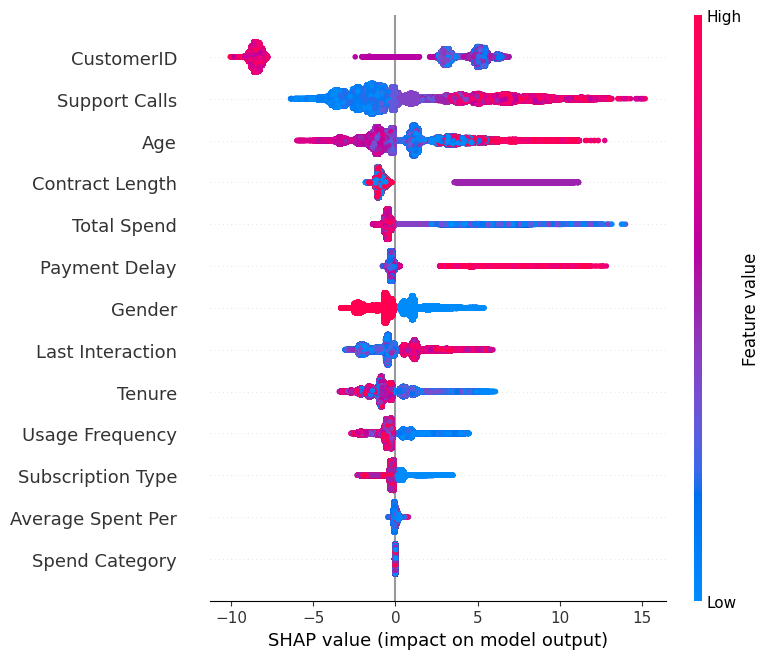

In [38]:
shap.summary_plot(shap_values, x)
